In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

#Reading Data
data=pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [4]:
 #finding mean of X and Y
m_x = np.mean(X)
m_y = np.mean(Y)

#length of X
m=len(X)
num = 0; dem = 0
for i in range(m):
    num += (X[i] - m_x)*(Y[i] - m_y)
    dem += (X[i] - m_x)**2
    b1 = num/dem
    b0 = m_y - (b1 * m_x)
    
#print coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


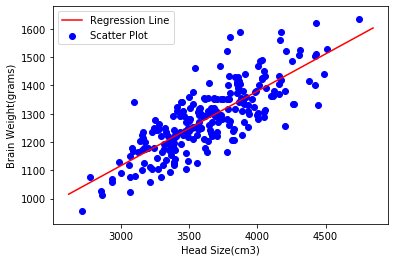

In [7]:
max_x =np.max(X) + 100
min_x=np.min(X) - 100
# calculating line values of x and y
x =np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

#plots
plt.plot(x, y, color='red', label='Regression Line')
plt.scatter(X, Y, color='blue', label ='Scatter Plot')
plt.xlabel('Head Size(cm3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [9]:
#calculating r_squared value to check model efficiency
s_t = 0 ; s_r = 0
for j in range(m):
    y_p = b0 + b1 * X[j]
    s_t += (Y[j] - m_y) ** 2
    s_r += (Y[j] - y_p) ** 2
r_squared = 1 -(s_r/ s_t)
print(r_squared)

0.6393117199570003


In [10]:
#implementing with scikit learn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#creating model
X = X.reshape((m, 1))
reg = LinearRegression()
#input training data
reg = reg.fit(X,Y)
#predicting value of Y
Y_pred = reg.predict(X)
#calculating rsquared score
r2_score = reg.score(X,Y)
print(r2_score)


0.639311719957
